# 各種校正方法訓練資料及性能總覽

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dataPreprocess import read_dataset

sns.set_theme(style='whitegrid', font_scale=2)

In [2]:
df = pd.read_csv('./results/experiments/methodCompare.csv')
df
colName = ['testingSession', 'method', 'rSquare']
data = []
for index, row in df.iterrows():
    for method in ['fixed model', 'daily retrain', 'domain mixed calibration', 'domain adversarial calibration',\
        'domain confusion calibration', 'fine-tune', 'domain adversarial calibration (unsupupervised)', \
            'domain confusion calibration (unsupupervised)']:

        data.append([row['testingSession'], method, row[method]])
df = pd.DataFrame(data, columns=colName)

(0.0, 1000.0)

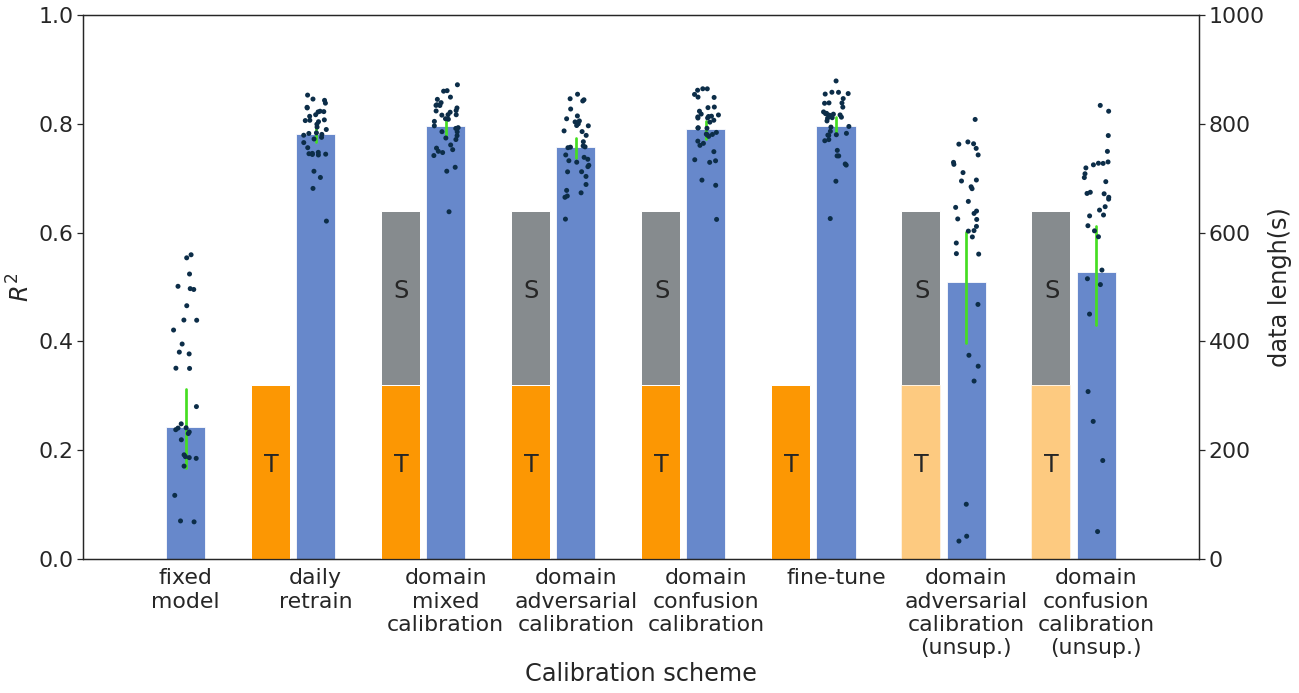

In [6]:
sns.set_theme(font_scale=2, style='white')

fig, ax = plt.subplots(1, 1, figsize=(20, 10))

sns.barplot(ax=ax, data=df, x='method', y='rSquare', alpha=0.8, color='#2c63d3', errcolor='#45de21')
sns.stripplot(ax=ax, data=df, x='method', y='rSquare', dodge=True, color='#0C2D48', alpha=1)

ax.set_xlabel('Calibration scheme')
ax.set_ylabel('$R^2$')
ax.set_ylim([0,1])
ax.set_xticklabels(['fixed\nmodel', 'daily\nretrain', 'domain\nmixed\ncalibration', 'domain\nadversarial\ncalibration',\
     'domain\nconfusion\ncalibration', 'fine-tune', 'domain\nadversarial\ncalibration\n(unsup.)', \
         'domain\nconfusion\ncalibration\n(unsup.)'])

for bar in ax.patches:
    x = bar.get_x()
    width = bar.get_width()
    centre = x+width/2.

    bar.set_x(centre - 0.3/2.)
    bar.set_width(0.3)

ax1 = ax.twinx()
ax1.bar(np.array([2, 3, 4, 6, 7]) - 0.5, 320, width=0.3, bottom=320, align='edge', color='#868B8E')
ax1.bar(np.array([1, 2, 3, 4, 5, 6, 7]) - 0.5, 320, width=0.3, bottom=0, align='edge', color='#fc9703')

for bar in ax1.patches:  
    if (bar.get_xy()[1] == 0):
        if (bar.get_xy()[0] == 5.5) or (bar.get_xy()[0] == 6.5):
            bar.set_alpha(0.5)

for bar in ax1.patches:
    x, y = bar.get_xy()
    if y == 0:
        ax1.text(x=x+0.1, y=y+160, s='T')
    else:
        ax1.text(x=x+0.1, y=y+160, s='S')

ax1.set_ylabel('data lengh(s)')
ax1.set_ylim([0, 1000])

# 假設檢定(結果偏怪..)

In [7]:
from scipy.stats import kruskal, friedmanchisquare

def pvalue2star(x):
    if x <= 1e-4:
        return '****', 4
    elif x <= 1e-3:
        return '***', 3
    elif x <= 1e-2:
        return '**', 2
    elif x <= 5e-2:
        return '*', 1
    elif x <= 1:
        return 'ns', 0

ndf = df.groupby('method', as_index=False).agg(lambda x: list(x))

kw = np.zeros([8, 8])
kw_annot = np.zeros([8, 8], dtype=str).tolist()
for i in range(len(ndf.index)):
    for j in range(len(ndf.index)):
        kw_annot[7-i][7-j], kw[7-i, 7-j] = pvalue2star(kruskal(ndf.iloc[i]['rSquare'], ndf.iloc[j]['rSquare']).pvalue)

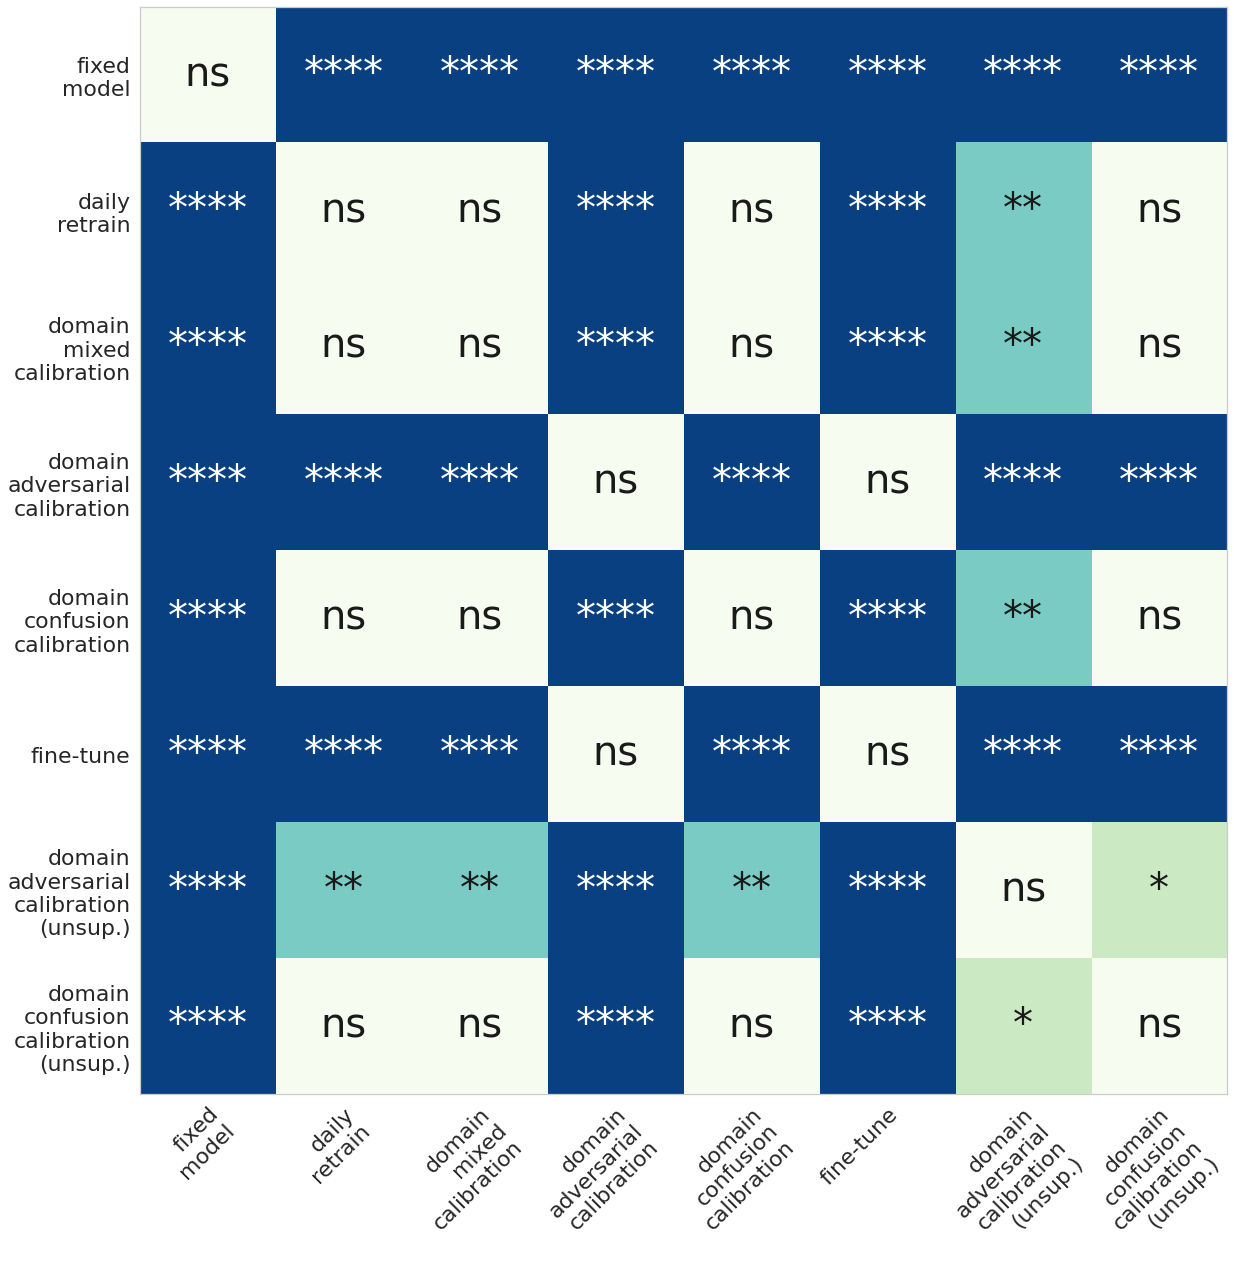

In [8]:
sns.set_theme(font_scale=2, style='whitegrid')

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
ax.imshow(kw, cmap='GnBu')

# We want to show all ticks...
ax.set_xticks(np.arange(8))
ax.set_yticks(np.arange(8))
# ... and label them with the respective list entries
ax.set_xticklabels(['fixed\nmodel', 'daily\nretrain', 'domain\nmixed\ncalibration', 'domain\nadversarial\ncalibration',\
     'domain\nconfusion\ncalibration', 'fine-tune', 'domain\nadversarial\ncalibration\n(unsup.)', \
         'domain\nconfusion\ncalibration\n(unsup.)'])
ax.set_yticklabels(['fixed\nmodel', 'daily\nretrain', 'domain\nmixed\ncalibration', 'domain\nadversarial\ncalibration',\
     'domain\nconfusion\ncalibration', 'fine-tune', 'domain\nadversarial\ncalibration\n(unsup.)', \
         'domain\nconfusion\ncalibration\n(unsup.)'])

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(8):
    for j in range(8):
        if kw_annot[i][j] == '****':
            text = ax.text(j, i, kw_annot[i][j], ha="center", va="center", color="w", fontsize = 40)
        else:
            text = ax.text(j, i, kw_annot[i][j], ha="center", va="center", color="k", fontsize = 40)

ax.grid(False)